In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import datetime
import math
from functions import *
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')

## Prérequis
##### Afin de pouvoir exécuter l'application sur votre poste, vous devez d'aborder charger les fichiers présentes à cette adresse : 
https://drive.google.com/drive/folders/1CjRP3DZpVj-mQxNsJG15I69e8Q1GKQx_?usp=sharing dans le dossier **“data”**

  * Les dossiers à copier sont : 
   * flipkart_com-ecommerce_sample_1050, 
   * images, 
   * features

# Utilitaires

In [2]:
def select_col_by_type(df,col_type) : 
    var_object = []
    for col in df.select_dtypes(col_type) :
        var_object.append(col)
    return var_object


def missing_presence(df, figsize):
    
    # Affichage de la forme du dataset
    print("Le dataset contient {} lignes et {} colonnes.".format(df.shape[0], df.shape[1]))
    
    # Proportion de valeurs nulles
    prop_nan_df = df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100
    print('Il y a {:.2f}% de NaN.'.format(prop_nan_df))
    
    # Visualisation des valeurs non nulles
    df_null=(df.notnull().sum()/df.shape[0]).sort_values(ascending=False)*100
    
    # Création de la figure
    plt.figure(figsize=figsize)
    plt.style.use('ggplot')
    ax=sns.barplot(x=df_null.values, y=df_null.index, orient='h')
    plt.title('Proportion de valeurs présentes par colonne')
    plt.xticks(rotation=0)
    plt.yticks(fontsize=14)
    plt.ylabel("Nom de la colonne")
    plt.xlabel('Pourcentage de valeurs présentes (%)')

    # Affichage de la valeur à côté des barres
    for index, value in enumerate(df_null.values):
        plt.text(value, index+0.4, str(value.round(2)))

    plt.show()

In [3]:
data_path = '../P6_Kakpo_Fiacre/data/'

In [4]:
dataset_fk = pd.read_csv(data_path + "flipkart_com-ecommerce_sample_1050.csv")

In [5]:
dataset_fk

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

Le dataset contient 1050 lignes et 15 colonnes.
Il y a 2.17% de NaN.


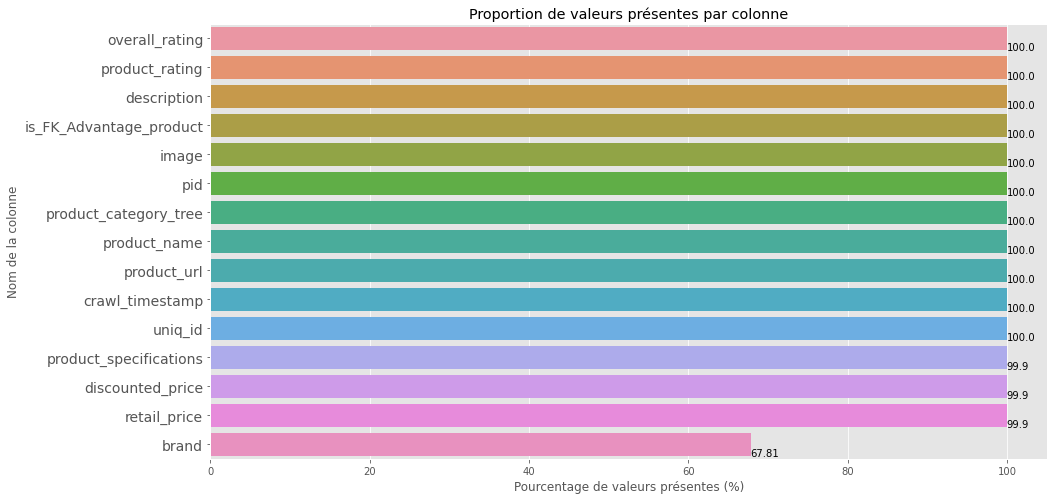

In [6]:
missing_presence(dataset_fk,(15, 8))

In [7]:
df = dataset_fk.copy()

In [8]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [9]:
fast_dataset_info(df)

Le jeu de données contient 1050 lignes et 15 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
brand                      0.321905
product_specifications     0.000952
discounted_price           0.000952
retail_price               0.000952
overall_rating             0.000000
product_rating             0.000000
description                0.000000
is_FK_Advantage_product    0.000000
image                      0.000000
pid                        0.000000
product_category_tree      0.000000
product_name               0.000000
product_url                0.000000
crawl_timestamp            0.000000
uniq_id                    0.000000
dtype: float64 valeurs vides


In [10]:
df.head(2).T

,0,1
uniq_id,55b85ea15a1536d46b7190ad6fff8ce7,7b72c92c2f6c40268628ec5f14c6d590
crawl_timestamp,2016-04-30 03:22:56 +0000,2016-04-30 03:22:56 +0000
product_url,http://www.flipkart.com/elegance-polyester-mul...,http://www.flipkart.com/sathiyas-cotton-bath-t...
product_name,Elegance Polyester Multicolor Abstract Eyelet ...,Sathiyas Cotton Bath Towel
product_category_tree,"[""Home Furnishing >> Curtains & Accessories >>...","[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
pid,CRNEG7BKMFFYHQ8Z,BTWEGFZHGBXPHZUH
retail_price,1899,600
discounted_price,899,449
image,55b85ea15a1536d46b7190ad6fff8ce7.jpg,7b72c92c2f6c40268628ec5f14c6d590.jpg
is_FK_Advantage_product,False,False


In [11]:
df.duplicated(subset=['uniq_id']).any()

False

In [12]:
df['product_name'].loc[1:4]

1                           Sathiyas Cotton Bath Towel
2                  Eurospa Cotton Terry Face Towel Set
3    SANTOSH ROYAL FASHION Cotton Printed King size...
4    Jaipur Print Cotton Floral King sized Double B...
Name: product_name, dtype: object

In [13]:
df['description'].loc[1]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel'

In [14]:
df['product_specifications'].loc[1]

'{"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Cotton"}, {"key"=>"Design", "value"=>"Self Design"}, {"key"=>"Brand", "value"=>"Sathiyas"}, {"key"=>"Type", "value"=>"Bath Towel"}, {"key"=>"GSM", "value"=>"500"}, {"key"=>"Model Name", "value"=>"Sathiyas cotton bath towel"}, {"key"=>"Ideal For", "value"=>"Men, Women, Boys, Girls"}, {"key"=>"Model ID", "value"=>"asvtwl322"}, {"key"=>"Color", "value"=>"Red, Yellow, Blue"}, {"key"=>"Size", "value"=>"Mediam"}, {"key"=>"Length", "value"=>"30 inch"}, {"key"=>"Width", "value"=>"60 inch"}, {"key"=>"Number of Contents in Sales Package", "value"=>"3"}, {"key"=>"Sales Package", "value"=>"3 Bath Towel"}]}'

In [15]:
df['product_category_tree'].loc[1:7]

1    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
5    ["Watches >> Wrist Watches >> Maserati Time Wr...
6    ["Watches >> Wrist Watches >> Camerii Wrist Wa...
7    ["Watches >> Wrist Watches >> T STAR Wrist Wat...
Name: product_category_tree, dtype: object

In [16]:
df['brand'].loc[1:7]

1                 Sathiyas
2                  Eurospa
3    SANTOSH ROYAL FASHION
4             Jaipur Print
5                      NaN
6                      NaN
7                      NaN
Name: brand, dtype: object

In [17]:
df = df.drop(columns=[
    'crawl_timestamp',
    'product_url',
    'pid',
    'retail_price',
    'discounted_price',
    'is_FK_Advantage_product',
    'product_rating',
    'overall_rating',
    'product_specifications',
])

df.head(3).T

,0,1,2
uniq_id,55b85ea15a1536d46b7190ad6fff8ce7,7b72c92c2f6c40268628ec5f14c6d590,64d5d4a258243731dc7bbb1eef49ad74
product_name,Elegance Polyester Multicolor Abstract Eyelet ...,Sathiyas Cotton Bath Towel,Eurospa Cotton Terry Face Towel Set
product_category_tree,"[""Home Furnishing >> Curtains & Accessories >>...","[""Baby Care >> Baby Bath & Skin >> Baby Bath T...","[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
image,55b85ea15a1536d46b7190ad6fff8ce7.jpg,7b72c92c2f6c40268628ec5f14c6d590.jpg,64d5d4a258243731dc7bbb1eef49ad74.jpg
description,Key Features of Elegance Polyester Multicolor ...,Specifications of Sathiyas Cotton Bath Towel (...,Key Features of Eurospa Cotton Terry Face Towe...
brand,Elegance,Sathiyas,Eurospa


In [18]:
fast_dataset_info(df)

Le jeu de données contient 1050 lignes et 6 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
brand                    0.321905
description              0.000000
image                    0.000000
product_category_tree    0.000000
product_name             0.000000
uniq_id                  0.000000
dtype: float64 valeurs vides


Le dataset contient 1050 lignes et 6 colonnes.
Il y a 5.37% de NaN.


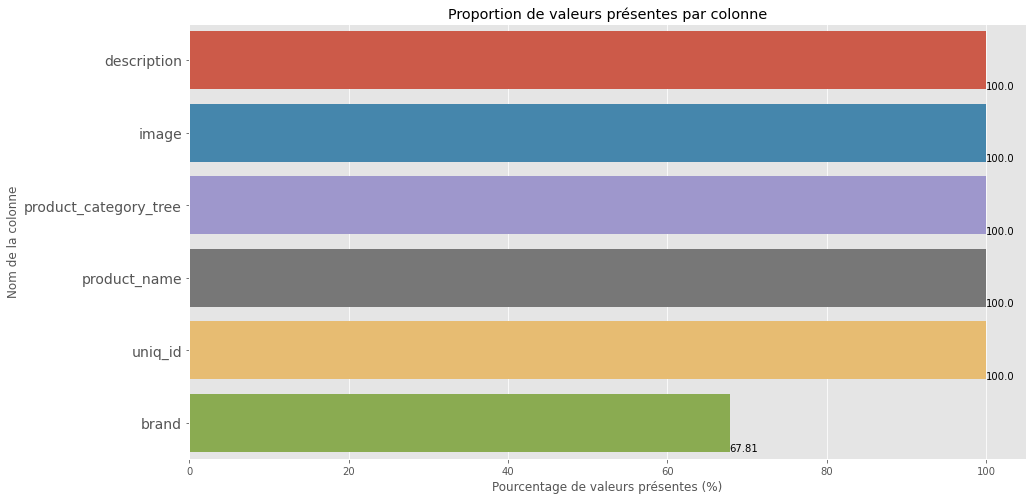

In [19]:
missing_presence(df,(15, 8))

# Traitements

In [20]:
#Traitement des catégories
def split_categories(category, level):
    '''Fonction qui affiche les '''
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat))<2:
            cat = [cat[0], 'None', 'None']
    return cat[level]

def split_categories_1(category):
    return split_categories(category,0)
def split_categories_2(category):
    return split_categories(category,1)
def split_categories_3(category):
    return split_categories(category,2)

def detail_categories(dataframe):
    dataframe['cat_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    return dataframe.drop(['product_category_tree'], axis=1)

In [21]:
data = detail_categories(df)
data

,uniq_id,product_name,image,description,brand,cat_1,cat_2,cat_3
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance,Home Furnishing,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,Baby Care,Baby Bath & Skin,Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,Baby Care,Baby Bath & Skin,Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,Home Furnishing,Bed Linen,Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,Home Furnishing,Bed Linen,Bedsheets
...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower,Baby Care,Baby & Kids Gifts,Stickers
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra,Baby Care,Baby & Kids Gifts,Stickers
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe,Baby Care,Baby & Kids Gifts,Stickers
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra,Baby Care,Baby & Kids Gifts,Stickers


In [22]:
# Check filling of cat 2 and cat 3

In [23]:
data.groupby('cat_2').count()['uniq_id'].sort_values(ascending=False)

cat_2
Wrist Watches                149
Laptop Accessories            87
Infant Wear                   84
Coffee Mugs                   74
Showpieces                    71
                            ... 
Strollers & Activity Gear      1
Women's Hygiene                1
Consumables & Disposables      1
Software                       1
Garden & Leisure               1
Name: uniq_id, Length: 62, dtype: int64

In [24]:
data.groupby('cat_3').count()['uniq_id'].sort_values(ascending=False)

cat_3
Deodorants                         65
Blankets, Quilts & Dohars          57
Baby Girls' Clothes                49
Routers                            49
USB Gadgets                        38
                                   ..
Malhar Showpieces                   1
Makeup Accessories                  1
MA Design Hut Showpieces            1
Lushomes Living Room Furnishing     1
Lanterns                            1
Name: uniq_id, Length: 242, dtype: int64

In [25]:
fast_dataset_info(data[["cat_1", "cat_2", "cat_3"]])

Le jeu de données contient 1050 lignes et 3 colonnes,  807 lignes dupliquées
Taux de valeurs manquantes :  
cat_3    0.0
cat_2    0.0
cat_1    0.0
dtype: float64 valeurs vides


There are 7 categories at 1st level.


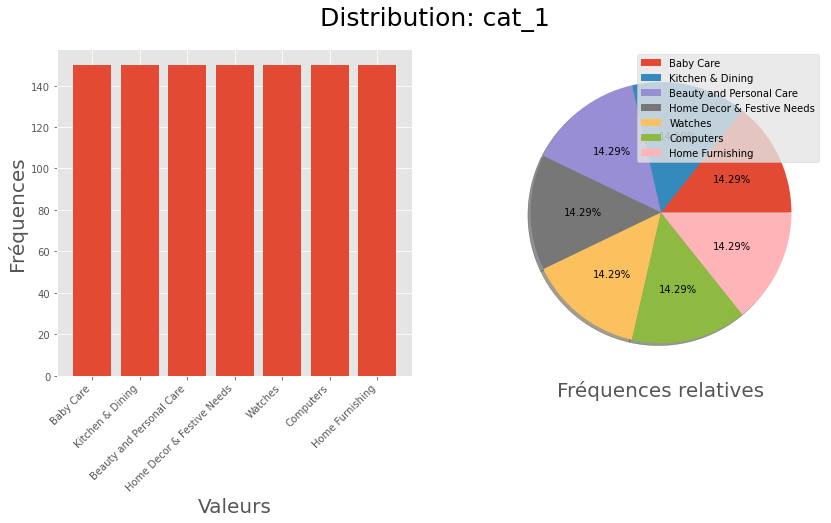

In [26]:
nb_cat1 = data['cat_1'].nunique()
print('There are {} categories at 1st level.'.format(nb_cat1))

fig = categorical_distribution(data['cat_1'])


In [27]:
# imputation of the missing 'brand' field by ''
data['brand'] = data['brand'].fillna('')

In [28]:
data = data.drop('brand', axis=1)

In [29]:
data

,uniq_id,product_name,image,description,cat_1,cat_2,cat_3
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,Bedsheets
...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,Stickers
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,Stickers
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,Stickers
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,Stickers


In [30]:
fast_dataset_info(data)

Le jeu de données contient 1050 lignes et 7 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
cat_3           0.0
cat_2           0.0
cat_1           0.0
description     0.0
image           0.0
product_name    0.0
uniq_id         0.0
dtype: float64 valeurs vides


In [31]:
data['large_description'] = data['product_name'] + ' ' + data['description']

In [32]:
data.head(3)

,uniq_id,product_name,image,description,cat_1,cat_2,cat_3,large_description
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet ...
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Cotton Bath Towel Specifications of S...
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Cotton Terry Face Towel Set Key Featur...


In [33]:
# Concatener les descriptions
corpus = data['large_description'].str.cat(sep=' ')

# Liste des mots utilisés
list_words = corpus.split()
print(" Le nombre total de mots est : {}".format(len(list_words)))
print("Le nombre total de mots uniques est: {}".format(len(set(list_words))))

 Le nombre total de mots est : 87644
Le nombre total de mots uniques est: 9591


### Traitement des données textuelles

Le TF-IDF (de l'anglais term frequency-inverse document frequency) est une méthode de pondération souvent utilisée en recherche d'information et en particulier dans la fouille de textes. 

Cette mesure statistique permet d'évaluer l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus. 

Le poids augmente proportionnellement au nombre d'occurrences du mot dans le document. 
Il varie également en fonction de la fréquence du mot dans le corpus. 

Des variantes de la formule originale sont souvent utilisées dans des moteurs de recherche pour apprécier la pertinence d'un document en fonction des critères de recherche de l'utilisateur.

In [34]:
from string import punctuation
from nltk.corpus import stopwords
stopwords_en = set(["a","a's","able","about","above","according","accordingly","across","actually",
                    "after","afterwards","again","against","ain't","all","allow","allows",
                    "almost","alone","along","already","also","although","always",
                    "am","among","amongst","an","and","another","any","anybody","anyhow",
                    "anyone","anything","anyway","anyways","anywhere","apart","appear",
                    "appreciate","appropriate","are","aren't","around","as","aside","ask",
                    "asking","associated","at","available","away","awfully","b","be","became",
                    "because","become","becomes","becoming","been","before","beforehand","behind",
                    "being","believe","below","beside","besides","best","better","between",
                    "beyond","both","brief","but","by","c","c'mon","c's","came","can","can't",
                    "cannot","cant","cause","causes","certain","certainly","changes","clearly",
                    "co","com","come","comes","concerning","consequently","consider","considering",
                    "contain","containing","contains","corresponding","could","couldn't","course",
                    "currently","d","definitely","described","despite","did","didn't","different",
                    "do","does","doesn't","doing","don't","done","down","downwards","during","e","each",
                    "edu","eg","eight","either","else","elsewhere","enough","entirely","especially",
                    "et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex",
                    "exactly","example","except","f","far","few","fifth","first","five","followed","following",
                    "follows","for","former","formerly","forth","four","from","further","furthermore",
                    "g","get","gets","getting","given","gives","go","goes","going","gone","got",
                    "gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have",
                    "haven't","having","he","he's","hello","help","hence","her","here","here's",
                    "hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself",
                    "his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've",
                    "ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated",
                    "indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd",
                    "it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known",
                    "knows","l","last","lately","later","latter","latterly","least","less","lest","let",
                    "let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly",
                    "many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most",
                    "mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary",
                    "need","needs","neither","never","nevertheless","new","next","nine","no","nobody",
                    "non","none","noone","nor","normally","not","nothing","novel","now","nowhere",
                    "o","obviously","of","off","often","oh","ok","okay","old","on","once","one",
                    "ones","only","onto","or","other","others","otherwise","ought","our","ours",
                    "ourselves","out","outside","over","overall","own","p","particular","particularly",
                    "per","perhaps","placed","please","plus","possible","presumably","probably","provides",
                    "q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding",
                    "regardless","regards","relatively","respectively","right","s","said","same","saw",
                    "say","saying","says","second","secondly","see","seeing","seem","seemed","seeming",
                    "seems","seen","self","selves","sensible","sent","serious","seriously","seven",
                    "several","shall","she","should","shouldn't","since","six","so","some","somebody",
                    "somehow","someone","something","sometime","sometimes","somewhat","somewhere",
                    "soon","sorry","specified","specify","specifying","still","sub","such","sup",
                    "sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx",
                    "that","that's","thats","the","their","theirs","them","themselves","then","thence",
                    "there","there's","thereafter","thereby","therefore","therein","theres","thereupon",
                    "these","they","they'd","they'll","they're","they've","think","third","this","thorough",
                    "thoroughly","those","though","three","through","throughout","thru","thus","to",
                    "together","too","took","toward","towards","tried","tries","truly","try","trying",
                    "twice","two","u","un","under","unfortunately","unless","unlikely","until",
                    "unto","up","upon","us","use","used","useful","uses","using","usually","uucp",
                    "v","value","various","very","via","viz","vs","w","want","wants","was","wasn't",
                    "way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't",
                    "what","what's","whatever","when","whence","whenever","where","where's","whereafter",
                    "whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither",
                    "who","who's","whoever","whole","whom","whose","why","will","willing","wish","with",
                    "within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd",
                    "you'll","you're","you've","your","yours","yourself",
                    "yourselves","z","zero"])

stopwords_nltk = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
stopwords_combined = set.union(stopwords_en, stopwords_nltk, stopwords_punct)

In [35]:
print('ponctuation : ', list(stopwords_punct)[0:10])
print('stopwords : ',list(stopwords_nltk)[0:10])

ponctuation :  ['/', '_', '=', '+', '*', '\\', ')', '~', ']', '{']
stopwords :  ["won't", 'than', "you'd", "you're", 'on', 'hasn', 'shan', 'has', 'so', 'whom']


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words=stopwords_combined,
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
corpus = data['large_description']
X = tfidf_vectorizer.fit_transform(corpus)

# Conversion to a dense array for later use
X_dense = X.todense()

print('La taille du vocabulaire: {}'.format(len(list(tfidf_vectorizer.vocabulary_))))
print('Le nombre de stop word : {}'.format(len(tfidf_vectorizer.stop_words_)))

La taille du vocabulaire: 2389
Le nombre de stop word : 3373


In [37]:
import operator

# sorting vectorizer.vocabulary_ by feature indices
sorted_voc = sorted(tfidf_vectorizer.vocabulary_.items(), key=operator.itemgetter(1))

# get the sorted list words from vocabulary
sorted_voc = [ word for (word, word_indice) in sorted_voc ]

# recreate pd.DataFrame with vocabulary
text_TFIDF = pd.DataFrame(X_dense, columns=sorted_voc)
text_TFIDF.columns = ['bow_' + str(col) for col in text_TFIDF.columns]

# display first rows of the tf-idf vectorization
text_TFIDF.head()

,bow_001,bow_005,bow_01,bow_03,bow_04,bow_05tg,bow_06,bow_085,bow_099,bow_10,...,bow_years,bow_yellow,bow_york,bow_young,bow_youth,bow_youthful,bow_yuva,bow_zipper,bow_zone,bow_zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.170343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042666,...,0.046041,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
np.savetxt(data_path + "features/text_TFIDF.csv", text_TFIDF)

## Option 2 : *Non-negative Matrix Factorization* (NMF)

In [39]:
from sklearn.decomposition import NMF

# Setting the number of topics equal to number of categories
no_topics = 7

# Instanciate NMF
nmf = NMF(n_components=no_topics, 
          random_state=100, 
          alpha=.1, 
          l1_ratio=.5, 
          init='nndsvd')

# Fitting the model
nmf.fit(text_TFIDF)

# Applying the model
text_NMF = nmf.transform(text_TFIDF)

In [40]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [41]:
no_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
watch analog men women discounts india sonata great maxima boys
Topic 1:
set combo flipkart shipping cash genuine delivery products 30 guarantee
Topic 2:
mug ceramic rockmantra coffee perfect gift loved safe prithish creation
Topic 3:
baby girl boy dress details cotton fabric neck shirt sleeve
Topic 4:
cm showpiece prices 10 brass handicrafts online 30 guarantee replacement
Topic 5:
abstract blanket single double quilts comforters multicolor raymond floral flipkart
Topic 6:
laptop battery cell hp pavilion lapguard skin shapes mouse pad


In [42]:
print(text_NMF.shape)
np.savetxt(data_path +"features/text_NMF.csv", text_NMF)

(1050, 7)


## Option 3 : *Latent Dirichlet Allocation* (LDA)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Instanciation of the tf-idf vectorizer
tf_vectorizer = CountVectorizer(
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words=stopwords_combined,
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)


# Application of the tf-idf vectorizer
corpus = data['large_description']  # TODO : fix with descriptions
tf = tf_vectorizer.fit_transform(corpus)

# Setting the number of topics equal to number of categories
n_topics = 7

# Instanciate LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                learning_method='online', learning_offset=50., random_state=100)

# Fitting the model
lda = lda.fit(tf)

# Applying the model
text_LDA = lda.transform(tf)

In [44]:
no_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names()
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
cm pack design color box features material polyester inch model
Topic 1:
skin combo set print shapes 15 pack price box ml
Topic 2:
mug ceramic coffee perfect mugs gift material rockmantra safe give
Topic 3:
baby cotton girl details fabric sticker boy dress ideal specifications
Topic 4:
products free delivery genuine cash shipping buy 30 day guarantee
Topic 5:
laptop warranty usb pad mouse quality adapter power battery light
Topic 6:
quilts comforters art times girls dark imported collection high large


In [45]:
def plot_LDA(components):
    # importing libraries
    import matplotlib.pyplot as plt

    # Setting the data to plot
    labels = ['topic_{}'.format(i) for i in range(len(components))]
    frequencies = components

    # Graphical properties of the main figure
    fig = plt.figure(figsize=(14, 6))

    # Main graphical properties of the second subplot (pieplot)
    plt.title("Belonging to topics (LDA)", fontsize=20)

    # plotting the plots
    plt.pie(frequencies,
                autopct='%1.2f%%',
                # shadow=True,
                  )

    plt.legend(labels, loc='upper right', )
    plt.show()
    return fig

Elegance Polyester Multicolor Abstract Eyelet Door Curtain


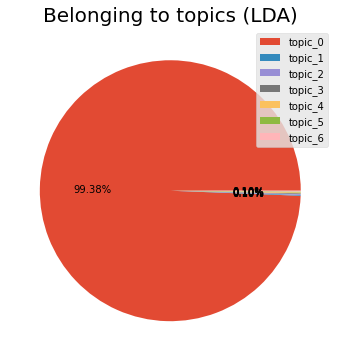

In [46]:
# Belonging to topics for first item
print(data['product_name'].iloc[0])
plot_LDA(text_LDA[0,:]);

In [47]:
# %%flake8  # checking PEP8 compliance

# Display shape of results
print(text_LDA.shape)

# Save the file (text type)
np.savetxt(data_path + "features/text_LDA.csv", text_LDA)

(1050, 7)


# Extraction de features à partir des données visuelles

## Prétraitements : redimensionnement, contraste et luminosité…

## Prétraitements sur une image

### Chargement des images

In [48]:
# import zipfile as zf
# files = zf.ZipFile("/Users/macbookproal/Desktop/images.zip", 'r')
# files.extractall(data_path + 'images/')
# files.close()

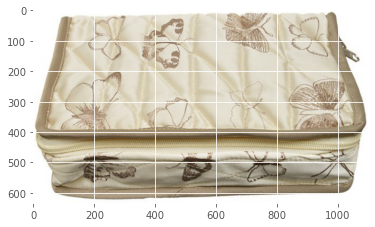

In [49]:
import cv2
import os
from matplotlib import pyplot as plt

# Get an exemple of image path
image_name = data['image'].loc[100]
img_dir_name = data_path + 'images/Images/'
file_path = os.path.join(img_dir_name, image_name)

# Read the file and convert it to color image
img = cv2.imread(file_path)
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(RGB_im)

### Redimensionnement

In [50]:
def resize_image(img, size, interpolation):
    """Function to resize image without deformation."""
    
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    
    if h == w: return cv2.resize(img, (size, size), interpolation)
    if h > w: dif = h 
    else:     dif = w
        
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    
    if c is None:
        # mask = np.zeros((dif, dif), dtype=img.dtype)
        mask = np.full((dif, dif), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
        
    else:
        # mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask = np.full((dif, dif, c), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
        
    return cv2.resize(mask, (size, size), interpolation)

(224, 224, 3)


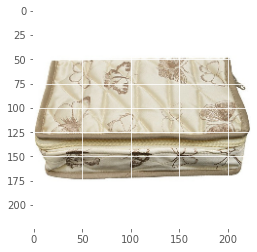

In [51]:
squared_image=resize_image(RGB_im, size=224, interpolation=cv2.INTER_AREA)
print(squared_image.shape)
plt.imshow(squared_image)

### Luminosité et contraste

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)


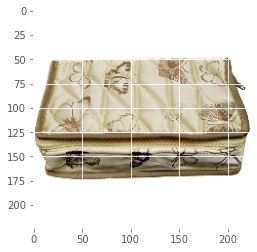

In [53]:
auto_result, alpha, beta = automatic_brightness_and_contrast(squared_image)
plt.imshow(auto_result)

### Prétraitements sur toutes les images

In [54]:
import os
import cv2 # opencv library for computer vision

# initializations
img_dir_read = img_dir_name
img_dir_write = data_path + 'images/preprocessed_images'

# for each product in the data
for index, row in data.iterrows():
    
    # get url of the product's image
    img_name = row['image']
    
    # create the path to the image file
    img_path = os.path.join(img_dir_read, img_name)
    
    # Read the file and convert it to color image
    img_file = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
    
    # resize the image to 224*224 pixels
    img_sqr = resize_image(img_rgb, size=224, interpolation=cv2.INTER_AREA)
    
    # auto-adjustment of contrast and luminosity
    img_preprocessed, alpha, beta = automatic_brightness_and_contrast(img_sqr)
    
    # save the preprocessed image
    img_preprocessed_path = os.path.join(img_dir_write, img_name)
    cv2.imwrite(img_preprocessed_path, img_preprocessed)

In [55]:
from IPython.core.display import HTML

img_dir_name_process = data_path + 'images/preprocessed_images'
tags = []

# Getting the list of categories of product
categories_list = list(data['cat_1'].unique())

# Iterating over categories of products
for category in categories_list:
    
    # Sampling n products belonging to the category
    mask = data['cat_1'] == category
    sample = data[mask].sample(n=15)
    
    # Iterating over each product in the sample
    
    tags.append('<br><b>{}</b><br>'.format(category))
    for index, row in sample.iterrows():
        # getting the path of image
        img_name = row['image']
        img_path = os.path.join(img_dir_name_process, img_name)
        
        # Create the html code for displaying the images
        tags.append('<img src="{}" width="60" style="display:inline"/>'.format(img_path))

tags.append('<br>')
# Display the images of the category
HTML(''.join(tags))

## Extractions des features en utilisant l'algorithme ORB

### Extraction des features et descripteurs

In [56]:
import cv2 # opencv library for computer vision

orb = cv2.ORB_create()
model = orb

In [57]:
def get_descriptors(image_path):
    
    # load image and convert it to grayscale
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # detect key points and descriptors
    keypoints, descriptors = model.detectAndCompute(img_gray, None)

    # returns keypoints and descriptors
    return keypoints, descriptors

Descripteurs :  (268, 32)


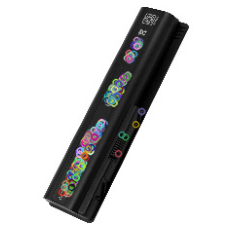

In [58]:
# get descriptors of the image
img_keypoints, img_descriptors = get_descriptors(img_path)

# get the image in gray
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

# melt the image with keypoints
img_kp = cv2.drawKeypoints(
    image=img_gray,
    keypoints=img_keypoints,
    outImage=None,
    #flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# show the grey image with keypoints
plt.imshow(img_kp)
plt.axis('off')
print("Descripteurs : ", img_descriptors.shape)

* L'image contient 438 descripteurs
* Chaque descripteur est un vecteur de longueur 32

## Création des descripteurs des images
* Pour chaque image, passage en gris et equalisation
* Création d'une liste de descripteurs par image qui sera utilisée pour réaliser les histogrammes par image
* Création d'une liste de descripteurs pour l'ensemble des images qui sera utilisé pour créer les clusters de descripteurs

In [59]:
from PIL import Image
import os
import cv2 # opencv library for computer vision

# initializations
dir_name = data_path + 'images/preprocessed_images'
data.loc[:,'descriptors'] = pd.Series(index=data.index)
data['descriptors'] = data['descriptors'].astype(object)
model_des = []
# computing descriptors for each image of product
for index, row in data.iterrows():
    
    # get url of the product's image
    img_name = row['image']
    
    # create the path to the image file
    img_path = os.path.join(dir_name, img_name)
    
    # get the keypoints and descriptors of image
    img_keypoints, img_descriptors = get_descriptors(img_path)
    model_des.append(img_descriptors)
    # add descriptors into a new column of the dataframe
    data.at[index, 'descriptors'] = img_descriptors
    
model_des_by_img = np.asarray(model_des)  
model_des_all    = np.concatenate(model_des_by_img, axis=0)
print("Nombre de descripteurs : ", model_des_all.shape)

Nombre de descripteurs :  (378866, 32)


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [60]:
#A revoir
from sklearn import cluster, metrics

# Determination number of clusters
k = int(round(np.sqrt(len(model_des_all)),0))

print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=100)
kmeans.fit(model_des_all)

#duration1=time.time()-temps1
#print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  616
Création de 616 clusters de descripteurs ...


MiniBatchKMeans(init_size=1848, n_clusters=616, random_state=100)

In [61]:
from sklearn.base import BaseEstimator

class GridSearch(BaseEstimator):
    """Classe permettant d'implémenter une recherche exhaustive sur grille
    (sans validation croisée) pour les algorithmes de clustering."""

    # Method: init
    # ------------------------------------------------------------------------------
    def __init__(
            self,
            estimator,  # clustering algorithm to test
            param_grid,  # research space for hyperparameters
            scoring=None):
        """Méthode d'initialisation prenant en entrée le modèle
        à tester et la grille de paramètres."""

        # getting parameters
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring

    # Method: fit
    # ------------------------------------------------------------------------------
    def fit(self, X):
        """Méthode permettant de réaliser la recherche sur grille,
        et renvoyant le meilleur modèle trouvé, ré-entraîné sur les données."""

        # initialization of the dict of results
        self.results_ = {"scores": [],
                         "params": [],
                         "models": [],
                         "fit_times": [],
                         "nb_clusters": [],
                         "gini_coef": []}

        # Loading modules
        from sklearn.model_selection import ParameterGrid

        # iterating upon all combinations of parameters
        for param_combination in ParameterGrid(param_grid):

            # instanciation of the model with selected parameters
            model = self.estimator(**param_combination)

            # Measuring training time while fitting the model on the data
            time_train = %timeit -n1 -r1 -o -q model.fit(X)
            time_train = time_train.average

            # Scoring the model
            print(self.scoring)
            if not self.scoring:  # if scoring parameter not defined
                model_score = model.score(X)
            else:  # if scoring parameter is defined
                try:
                    labels = model.labels_
                    model_score = self.scoring(X, labels)
                except:
                    model_score = np.nan
            print(model_score)
            
            # Computing number of clusters, excluding noise (#-1)
            nb_clusters = \
                len(set(model.labels_)) - (1 if -1 in set(model.labels_) else 0)
            nb_clusters = int(nb_clusters)
            print(nb_clusters)

            # saving results, parameters and models in a dict
            self.results_["scores"].append(model_score)  # scores
            self.results_["params"].append(param_combination)  # parameters
            self.results_["models"].append(model)  # trained models
            self.results_["fit_times"].append(time_train)  # training time
            self.results_["nb_clusters"].append(nb_clusters)  # nb of clusters
        
        # Selecting best model (assumes that 'greater is better')
        # -----------------------------------
        best_model_index, best_score = None, None  # initialisation
        # iterating over scores
        for index, score in enumerate(self.results_["scores"]):

            # initialisation
            if not best_score:
                best_score = score
                best_model_index = index

            # if score is better than current best_score
            if score > best_score:
                # update the current best_score and current best_model_index
                best_score = score
                best_model_index = index
        
        # Update attributes of the instance
        self.best_score_ = self.results_["scores"][best_model_index]
        self.best_params_ = self.results_["params"][best_model_index]
        self.best_estimator_ = self.results_["models"][best_model_index]
        self.best_index_ = best_model_index
        self.refit_time_ = self.results_["fit_times"][best_model_index]

        return self

    # Method: predict
    # ------------------------------------------------------------------------------
    def predict(self, X_test):
        """Méthode permettant de réaliser les prédictions sur le jeu de test,
        en utilisant le meilleur modèle trouvé avec la méthode .fit
        entraîné sur le jeu d'entraînement complet."""

        # use the .predict method of the estimator on the best model
        return self.best_model.predict(X_test)

In [62]:
# importing modules
from sklearn import cluster
# from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Definition of the search space for hyperparameters
param_grid = {
    "n_clusters": [100, 200, 500, 616, 1000, 2000, 5000],  # vocabulary_size
}

# instanciation of the GridSearch object
kmeans_search = GridSearch(
    estimator=cluster.MiniBatchKMeans,
    param_grid=param_grid,
    # scoring=silhouette_score,
    scoring=calinski_harabasz_score,
)

# Proceeding the grid search
kmeans_search.fit(model_des_all)

# Displays best parameters
print("Best hyperparameters:", kmeans_search.best_params_)
print("Best Silhouette score:", kmeans_search.best_score_)
#print("Training time:", kmeans_search.refit_time_)

<function calinski_harabasz_score at 0x11d2aed30>
2474.3752807116916
100
<function calinski_harabasz_score at 0x11d2aed30>
1442.667020840936
200
<function calinski_harabasz_score at 0x11d2aed30>
696.3856497989947
500
<function calinski_harabasz_score at 0x11d2aed30>
590.4701087543162
616
<function calinski_harabasz_score at 0x11d2aed30>
398.155477354605
1000
<function calinski_harabasz_score at 0x11d2aed30>
193.21952731903437
2000
<function calinski_harabasz_score at 0x11d2aed30>
93.68058771972576
4999
Best hyperparameters: {'n_clusters': 100}
Best Silhouette score: 2474.3752807116916
Training time: 12.898325441000011


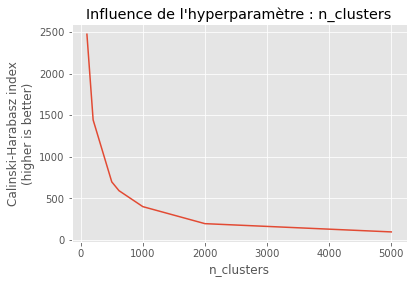

In [63]:
# Getting the list of parameters and list of scores
n_clusters_list = [kmeans_search.results_['params'][i]['n_clusters']
                   for i in range(len(kmeans_search.results_['params']))]
scores_list = kmeans_search.results_['scores']

# Plotting the influence of the single hyperparameter
plt.xlabel("n_clusters")
plt.ylabel("Calinski-Harabasz index\n(higher is better)")
plt.title("Influence de l'hyperparamètre : n_clusters")
plt.plot(n_clusters_list, scores_list);

#### Segmentation des descripteurs

In [64]:
from sklearn.cluster import MiniBatchKMeans

# set the size of the vocabulary of visual words
vocabulary_size = 100

# instanciate a clustering model
kmeans = MiniBatchKMeans(
    n_clusters vocabulary_size,
    random_state=100,
    init_size=3000,
)

# apply the clustering model
kmeans.fit(model_des_all)

MiniBatchKMeans(init_size=3000, n_clusters=616, random_state=100)

#### Création des histogrammes ("bags-of-visual-words")

In [65]:
# initialization
data.loc[:,'visual_words'] = pd.Series(index=data.index)
data['visual_words'] = data['visual_words'].astype(object)

# for each image, convert descriptors into a list of visual words
for index, row in data.iterrows():
    if data.loc[index, 'descriptors'] is not None:
        visual_words_predict = list(kmeans.predict(data.loc[index, 'descriptors']))
    else:
        visual_words_predict = []
    # save the list of visual words
    data.at[index, 'visual_words'] = visual_words_predict

In [66]:
# %%flake8  # checking PEP8 compliance

# Convert the list to a DataFrame with relative frequencies
def frequency_encoding(dataframe, feature, prefix):

    # ---------------------------------------------------
    # Function to convert list of values to a value:frequency dict
    def list_to_dict(my_list):
        dictionnary = {}
        for item in my_list:
            if item not in dictionnary.keys():
                dictionnary[item] = 1
            else:
                dictionnary[item] += 1
        return dictionnary
    
    # ------------------------------------------------
    # Function to FrequencyVectorize a dictionnary
    def frequency_encoding_from_dict(dictionnary):
        frequencies = pd.Series()
        total_frequency = sum(dictionnary.values())

        for key, value in dictionnary.items():
            frequencies[prefix + str(key)] = value / total_frequency

        return frequencies

    # ------------------------------------------------
    # Convert lists to dictionnary
    dataframe[feature] = dataframe[feature].apply(list_to_dict)

    # Proceed to the frequency encoding
    frequency_df = dataframe[feature]\
        .apply(frequency_encoding_from_dict).fillna(0)

    # Return the frequency_encoding pd.DataFrame
    return frequency_df

In [67]:
# frequency encoding of bags-of-visual-words
img_BOVW = frequency_encoding(data, 'visual_words', 'vw_')

In [68]:
# Save the file (text type)
np.savetxt(data_path + "features/img_BOVW.csv", img_BOVW)

# Segmentation des produits

## Chargement des variables standardisées

In [69]:
# loading features from textual fields
text_TFIDF = np.loadtxt(open(data_path + "features/text_TFIDF.csv", "rb"))
text_NMF = np.loadtxt(open(data_path + "features/text_NMF.csv", "rb"))
text_LDA = np.loadtxt(open(data_path + "features/text_LDA.csv", "rb"))
# loading features from image
img_BOVW = np.loadtxt(open("data/features/img_BOVW.csv", "rb"))


In [70]:
from sklearn.preprocessing import StandardScaler

# Apply the standard scaler to the TF-IDF features
text_TFIDF_std = StandardScaler().fit_transform(text_TFIDF)

# Apply the standard scaler to the Bags-of-features
img_BOVW_std = StandardScaler().fit_transform(img_BOVW)

## Réduction de dimensions (par ACP)

In [71]:
def PCA_features_reduction(X_std, var_threshold=0.9, verbose=True):
    """Return the principal components from PCA, until variance threshold."""

    from sklearn import decomposition
    
    if verbose == True:
        print("Initial number of features:", X_std.shape[1])
    
    # Processing the PCA
    pca = decomposition.PCA()
    pca.fit(X_std)
    
    # Getting the explained variance ratio for each principal component
    scree = pca.explained_variance_ratio_

    # Getting the number of principal components to reach variance thresholds
    mask = scree.cumsum() > var_threshold
    nb_selected_features = len(scree[~mask]) + 1
    if verbose == True:
        print("Number of selected features:", nb_selected_features)
    
    # Compute and displays the actual ratio of explained variance
    explained_variance_sum = scree.cumsum()[nb_selected_features-1]
    if verbose == True:
        print("Cumulative explained variance:  {:.2f}%".format(explained_variance_sum*100))
    
    # Getting the projection of the data on the first components
    X_projected = pca.transform(X_std)[:,:nb_selected_features]
    
    return X_projected

In [72]:
# Applying dimensional reduction (PCA)
print('----------------------------------------------')
text_TFIDF_pca = PCA_features_reduction(text_TFIDF_std, var_threshold=0.90)

print('----------------------------------------------')
img_BOVW_pca = PCA_features_reduction(img_BOVW_std, var_threshold=0.90)

----------------------------------------------
Initial number of features: 2389
Number of selected features: 489
Cumulative explained variance:  90.03%
----------------------------------------------
Initial number of features: 616
Number of selected features: 342
Cumulative explained variance:  90.07%


## Évaluation des segmentations

**Indice de Rand Ajusté** (ARI)
L'*Adjusted Rand Index* (ARI) est la normalisation de RI qui permet de comparer deux partitions de nombres de classes différentes.

$ ARI = \frac{RI-E(RI)}{max(RI)-E(RI)}$
* RI : indice de Rand : proportion de paires de points qui sont groupés de la même façon dans les deux partitions.
* E(RI) : espérance de l'indice de Rand (pour une partition aléatoire)
* max(RI) : indice de Rand maximal qui pourrait être obtenu étant donné le nombre de classes distincts.

In [73]:
from sklearn.metrics.cluster import adjusted_rand_score
import statistics

def evaluate_clusterings(features_std, nb_iter=5):
    
    # initializations
    labels_true = data['cat_1']
    ARI_list = []

    # iterating for robustness of measures
    for i in range(nb_iter):
        
        # fitting the model
        kmeans.fit(features_std)

        # getting the predicted labels
        labels_pred = kmeans.labels_

        # computing the ARI score
        ARI_score= adjusted_rand_score(labels_true, labels_pred)

        # appending the ARI score
        ARI_list.append(ARI_score)

    # Compute the mean and standard deviation of ARI scores
    ARI_mean = statistics.mean(ARI_list)
    ARI_std = statistics.stdev(ARI_list)
    
    # returning mean and standard deviation of ARI scores
    return ARI_mean, ARI_std

In [74]:
from sklearn import cluster

# kmeans model with as much clusters as categories
kmeans = cluster.MiniBatchKMeans(
    n_clusters=7, # main categories of products
    random_state= 100, # for reproductibility
)

In [75]:
import itertools

text_features_dict = {
    'text_TFIDF':text_TFIDF_std,
    'text_NMF': text_NMF,
    'text_LDA': text_LDA,
    'None':None,
}

img_features_dict = {
    'img_BOVW':img_BOVW_pca,
    'None':None,
}

results_df = pd.DataFrame()

for feats in itertools.product(text_features_dict, img_features_dict):
    if (feats[0] is not 'None') or (feats[1] is not 'None'):
        if feats[0] is 'None':
            name = feats[1]
            features_std = img_features_dict[feats[1]]
        elif feats[1] is 'None':
            name = feats[0]
            features_std = text_features_dict[feats[0]]
        else:
            # concatenate the features from description and features from image
            name = feats[0] + ' | ' + feats[1]
            features_std = np.concatenate((text_features_dict[feats[0]], img_features_dict[feats[1]]) , axis=1)
            
        # computing the mean and standard deviation for ARI scores
        ARI_mean, ARI_std = evaluate_clusterings(features_std, nb_iter=10)
        
        # create the name for further plotting
        results_df.loc[name, 'ARI mean'] = ARI_mean
        #results_df.loc[name, 'ARI std'] = ARI_std
        
# print results
results_df

,ARI mean
text_TFIDF | img_BOVW,0.006276
text_TFIDF,0.001886
text_NMF | img_BOVW,0.031924
text_NMF,0.219306
text_LDA | img_BOVW,0.031370
text_LDA,0.147599
img_BOVW,0.031924


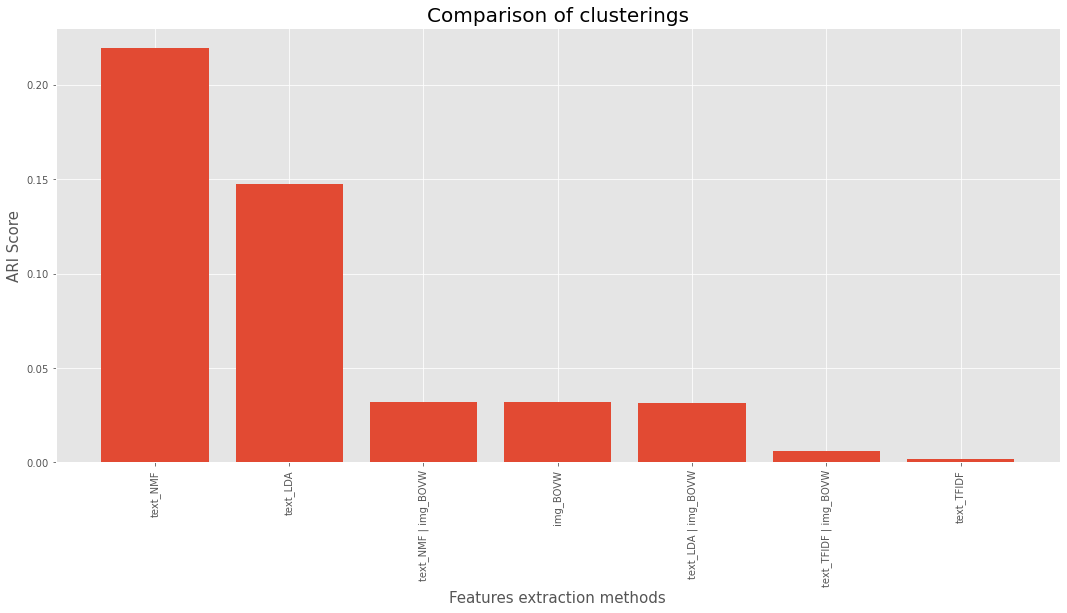

Best ARI results: 21.9%


In [77]:
ind = np.arange(len(results_df))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

results_df = results_df.sort_values(by='ARI mean', ascending=False)
means = results_df['ARI mean']
#std_errors = results_df['ARI std']
x_labels = list(results_df.index)

plt.figure(figsize=(18,8))
plt.bar(ind, means, 
        #yerr=std_errors
       )
plt.ylabel('ARI Score', size=15)
plt.xlabel('Features extraction methods', size=15)
plt.title('Comparison of clusterings', size=20)
plt.xticks(ind, x_labels)
plt.xticks(rotation='90', horizontalalignment="center")

plt.show()

print("Best ARI results: {:.1f}%".format(
    100*results_df['ARI mean'].iloc[0],
    #100*results_df['ARI std'].iloc[0],
    results_df.index[0]
))

#± {:.1f}% with {}.

## Projection plane par t-SNE
Avec coloration des points en fonction de la catégorie de produit et glyphe en fonction du cluster ?

In [78]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=100)
X_tsne = tsne.fit_transform(text_NMF)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["cat_1"]
print(df_tsne.shape)


(1050, 3)


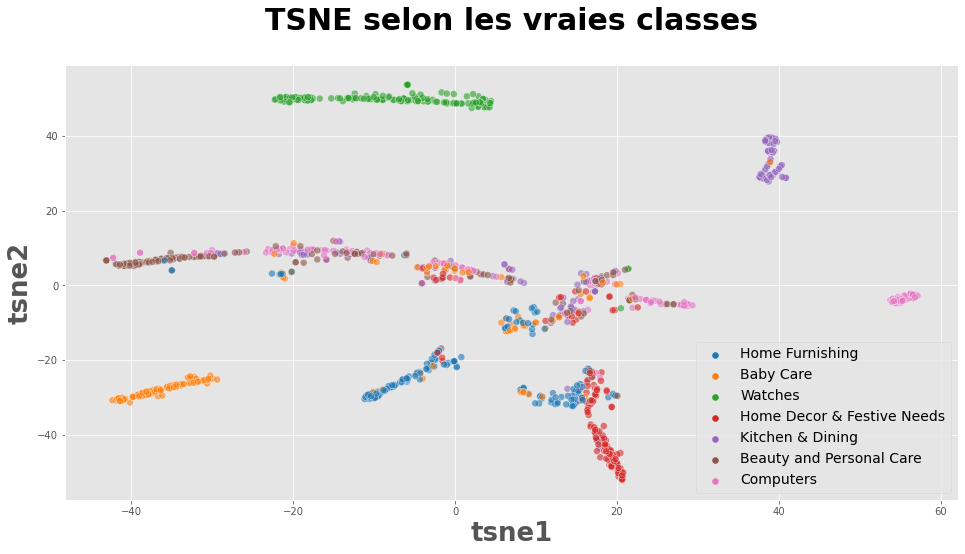

In [79]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), 
    s=50, 
    alpha=0.6
)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

###  Création de clusters à partir du T-SNE

In [80]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=100)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

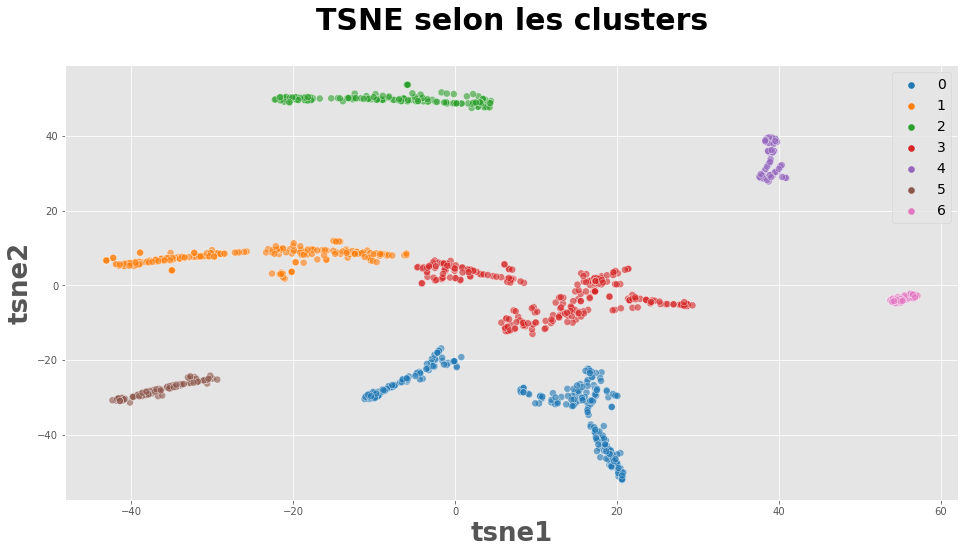

In [81]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

#labels = data["label"]
#print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

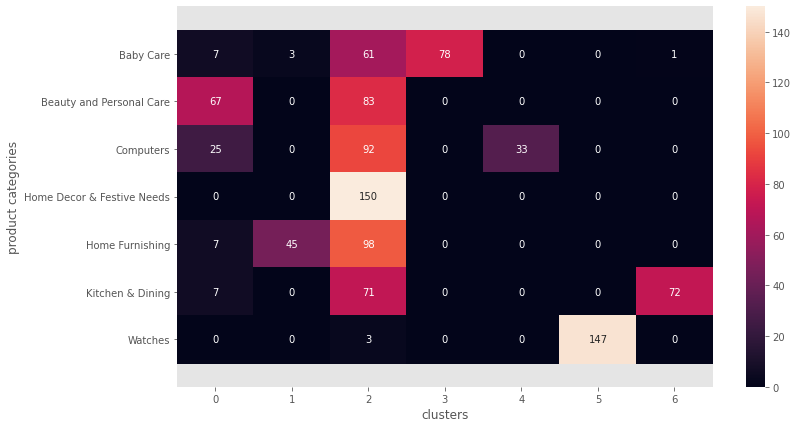

In [82]:
import seaborn as sn
import matplotlib.pyplot as plt

# Setting the variables to keep
features_std = text_NMF

# fitting the model
kmeans.fit(features_std)

# getting the predicted labels
labels_pred = kmeans.labels_

# Create crosstab: ct
ct = pd.crosstab(data['cat_1'], labels_pred)

# plot the heatmap
plt.figure(figsize = (12,7))
ax = sn.heatmap(ct, annot=True, fmt='g')
ax.set_xlabel('clusters')
ax.set_ylabel('product categories')

# fix a displaying problem
ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5);